# Assignment 2 - Machine Learning Basics

## *Yifei Wang*
Netid:  *yw323*

Github link: *https://github.com/ywang512/ids705*

Gitlab link: *https://gitlab.oit.duke.edu/ids705-sp19/yifeiwang*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

#### **ANSWER**

1. Since the sample size is extremely large, the flexible could perform better, by taking fully advantage of these data to make the model converge. The increase of model variance is relatively slow and the model bias could be decreased by a more flexible model.

2. Since the sample size is small, an inflexible model could perform better here. A flexible model would have a fastly increasing variance, while the bias soon converge to the lowest value, which is over-fitting the dataset.

3. Maybe a flexible model could perform better here, because it could generate a much wider range of possible shapes for estimation. And non-linear relationship means more degrees of freedom, so flexible could perform better.

4. An inflexible model could perform better here, because it could, to some extend, "neglect" the effect of error. On the contrary, a flexible model might be overfitting to the real value plus the error terms, which might not perform well in the test cases.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

*Suppose we don't need to treat the index as a predictor, like the firms name in (a), product id in (b) and the week index in (c).*

**(a)** 

(i). This is a regression problem.

(ii). We are most interested in inference for this problem.

(iii). Sample size $n = 500$ and number of predictors $p = 3$.


**(b)** 

(i). This is a classification problem.

(ii). We are most interested in prediction for this problem.

(iii). Sample size $n = 20$ and number of predictors $p = 13$.

**(c)** 

(i). This is a regression problem.

(ii). We are most interested in prediction for this problem.

(iii). Sample size $n$ equals to how many weekly data of 2012 we could get (maybe $n=51$) and number of predictors $p = 3$.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
### (a) Write your own kNN classifier
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        '''Save the training data to properties of this class
        Assume x is a np.array with dimension 2
        and y is a np.array with dimension 1
        rows as observations and columns as variables'''
        
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        '''Assuem x is a 2-D array with each row as an observation
        k is an possitive integer'''
        y_hat = [] # Variable to store the estimated class label for 
        
        for x_i in x:
            D = [np.sqrt(np.sum((x_i-j)**2)) for j in self.x] # 1-dim
            y_D = sorted(zip(D, self.y), key = lambda x: x[0])[:k]
            y_i_hat = 1 if np.mean([pair[1] for pair in y_D]) > 0.5 else 0
            y_hat.append(y_i_hat)

        return np.array(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [2]:
### b
x_train_low = np.loadtxt("data/A2_X_train_low.csv", delimiter=',')
y_train_low = np.loadtxt("data/A2_y_train_low.csv", delimiter=',')
x_train_high = np.loadtxt("data/A2_X_train_high.csv", delimiter=',')
y_train_high = np.loadtxt("data/A2_y_train_high.csv", delimiter=',')
x_test_low = np.loadtxt("data/A2_X_test_low.csv", delimiter=',')
y_test_low = np.loadtxt("data/A2_y_test_low.csv", delimiter=',')
x_test_high = np.loadtxt("data/A2_X_test_high.csv", delimiter=',')
y_test_high = np.loadtxt("data/A2_y_test_high.csv", delimiter=',')


### c
import time
K = 5
print("="*20 + " self-defined KNN function " + "="*20)
start = time.time()
low = Knn()
low.fit(x_train_low, y_train_low)
low_y = low.predict(x_test_low, K)
end = time.time()
print("LOW dimension precision: ", accuracy(y_test_low, low_y))
print("time consumed: %.5f s" % (end - start))
print("-"*50)
start = time.time()
high = Knn()
high.fit(x_train_high, y_train_high)
high_y = high.predict(x_test_high, K)
end = time.time()
print("HIGH dimension precision: ", accuracy(y_test_high, high_y))
print("time consumed: %.5f s" % (end - start))

==================== self-defined KNN function ====================
LOW dimension precision:  0.925
time consumed: 7.40914 s
--------------------------------------------------
HIGH dimension precision:  0.993
time consumed: 6.84253 s


In [3]:
### d
from sklearn.neighbors import KNeighborsClassifier

print("="*20 + " sklearn KNN function " + "="*20)
start = time.time()
low_sk = KNeighborsClassifier(n_neighbors = K)
low_sk.fit(x_train_low, y_train_low)
low_sk_pre = low_sk.predict(x_test_low)
end = time.time()
print("LOW dimension precision: ", accuracy(y_test_low, low_sk_pre))
print("time consumed: %.5f" % (end - start))
print('-'*50)
start = time.time()
high_sk = KNeighborsClassifier(n_neighbors = K)
high_sk.fit(x_train_high, y_train_high)
high_sk_pre = high_sk.predict(x_test_high)
end = time.time()
print("HIGH dimension precision: ", accuracy(y_test_high, high_sk_pre))
print("time consumed: %.5f" % (end - start))

==================== sklearn KNN function ====================
LOW dimension precision:  0.925
time consumed: 0.01002
--------------------------------------------------
HIGH dimension precision:  0.993
time consumed: 0.16336


**(e).** In reality, information is always rapidly changing, so most application requires a high responding speed, such as Web APPs, real-time decision making, market analysis, etc. In these scenario, we usually could afford a relatively longer training time, in exchange for a shorter prediction time to make real-time feedbacks. If an algorithm has a slow prediction speed, like KNN, it might miss the best chance for companies to make a "best" decision. Due to the long prediction process, that might be an optimized decision for an hour before but not now, which is critical to some time-sensitive field like stock market.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

**(a)** Here is the code and table.

In [4]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

x_test = np.zeros((6,3))
D = np.sqrt(np.sum((X - x_test)**2, axis = 1)).reshape(6,1)
D

array([[3.        ],
       [2.        ],
       [3.16227766],
       [2.23606798],
       [1.41421356],
       [1.73205081]])

| Obs. |   D   |   y   |
|------|-------|  ---  |
| **1**|   3   |  Red  |
| **2**|   2   |  Red  |
| **3**|$\sqrt{10}$|  Red  |
| **4**|$\sqrt5$| Blue  |
| **5**|$\sqrt2$|  Blue  |
| **6**|$\sqrt3$|  Red  |

**(b).** When $K = 1$, we simply choose the class of the nearest (the first closest) observation to our test point. The observation is 5, with label "Blue". Thus the prediction for our test point is "Blue"

In [5]:
K = 1
knn_4_1 = KNeighborsClassifier(n_neighbors=K)
knn_4_1.fit(X, y)
print(knn_4_1.predict(np.array([0,0,0]).reshape(1,3)))

['b']


**(c).** When $K = 3$, we would choose the most frequent class of the first 3 closest observation to our test point. These 3 observations are 2, 5 and 6, with labels "Red", "Blue" and "Red". Thus the prediction for our test point is "Red".

In [6]:
K = 3
knn_4_3 = KNeighborsClassifier(n_neighbors=K)
knn_4_3.fit(X, y)
print(knn_4_3.predict(np.array([0,0,0]).reshape(1,3)))

['r']


**(d).** In this scenario, we expect the $K$ to be small. The smaller the $K$ is, the more "scatter" and less smooth the boundary would be. On the other hand, the greater the $K$ is, the more smooth the boundary would be. Moreover, when K goes to infitive (sample size), the boundary would converge to a straight curve. The Bayes decision boundary represent the optimized boudary of the underlying true distribution. Therefore, we expect the best value for $K$ would not be large.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [7]:
### a
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib import cm
np.random.seed(828)

x, y = make_moons(n_samples = 1000, noise = 0.35)
x_1 = x[:,0]
x_2 = x[:,1]

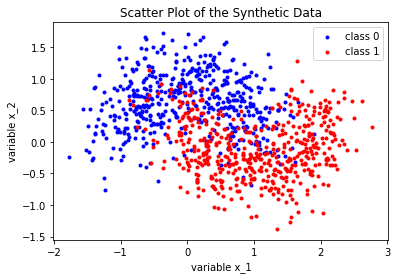

In [8]:
### b
i0 = np.where(y == 0)
i1 = np.where(y == 1)
plt.scatter(x_1[i0], x_2[i0], c='b', marker = '.', label = 'class 0')
plt.scatter(x_1[i1], x_2[i1], c='r', marker = '.', label = 'class 1')
plt.title("Scatter Plot of the Synthetic Data")
plt.xlabel("variable x_1")
plt.ylabel("variable x_2")
plt.legend()
plt.show()

In [9]:
### c
sam1 = np.random.choice(1000, 100)
sam2 = np.random.choice(1000, 100)
sam3 = np.random.choice(1000, 100)
x1 = x[sam1]; y1 = y[sam1]; x1_1 = x1[:,0]; x1_2 = x1[:,1]
x2 = x[sam2]; y2 = y[sam2]; x2_1 = x2[:,0]; x2_2 = x2[:,1]
x3 = x[sam3]; y3 = y[sam3]; x3_1 = x3[:,0]; x3_2 = x3[:,1]

N_grid = 501
grid_x = np.linspace(-2, 3, N_grid)
grid_y = np.linspace(-2, 2, N_grid)
XX, YY = np.meshgrid(grid_x, grid_y)
x_pre = np.stack((XX.flatten(), YY.flatten()), axis = -1)

def KNN_PRE(x, y, x_pre, k, N):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pre = knn.predict(x_pre)
    y_pre = y_pre.reshape(N, N)
    return knn, y_pre

# sample 1
knn1_1, Z1_1 = KNN_PRE(x1, y1, x_pre, 1, N_grid)
knn1_25, Z1_25 = KNN_PRE(x1, y1, x_pre, 25, N_grid)
knn1_50, Z1_50 = KNN_PRE(x1, y1, x_pre, 50, N_grid)
# sample 2
knn2_1, Z2_1 = KNN_PRE(x2, y2, x_pre, 1, N_grid)
knn2_25, Z2_25 = KNN_PRE(x2, y2, x_pre, 25, N_grid)
knn2_50, Z2_50 = KNN_PRE(x2, y2, x_pre, 50, N_grid)
# sample 3
knn3_1, Z3_1 = KNN_PRE(x3, y3, x_pre, 1, N_grid)
knn3_25, Z3_25 = KNN_PRE(x3, y3, x_pre, 25, N_grid)
knn3_50, Z3_50 = KNN_PRE(x3, y3, x_pre, 50, N_grid)

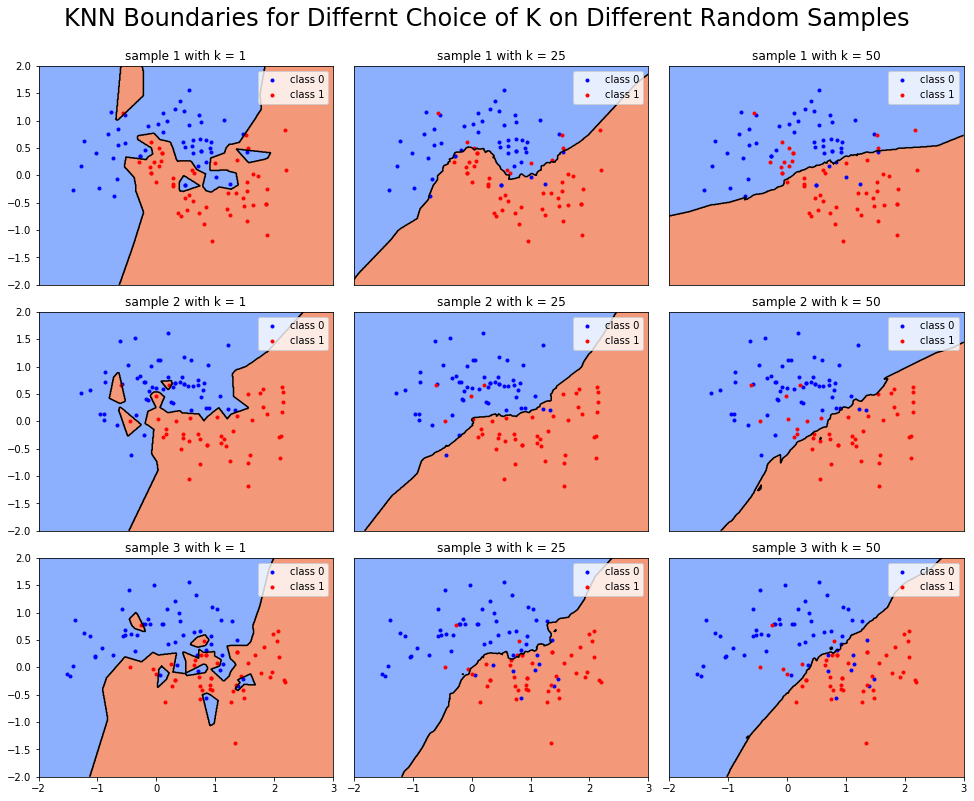

In [10]:
### d
from matplotlib import cm

def PRE_PLOT(ax, X, Y, Z, x1, x2, y, s, k, P):
    i0 = np.where(y == 0)
    i1 = np.where(y == 1)
    cset = ax.contourf(X, Y, Z, levels = (-1,0,1), cmap=cm.coolwarm)
    ax.contour(cset, colors = 'k')
    ax.scatter(x1[i0], x2[i0], c='b', marker='.', label = 'class 0')
    ax.scatter(x1[i1], x2[i1], c='r', marker='.', label = 'class 1')
    ax.legend()
    ax.set_title("sample %d with k = %d" % (s, k))
    if P < 6:
        ax.set_xticks([])
    if P % 3 != 0:
        ax.set_yticks([])

fig, axs = plt.subplots(3, 3, figsize = (15, 12))
PRE_PLOT(axs[0,0], XX, YY, Z1_1, x1_1, x1_2, y1, 1, 1, 0)
PRE_PLOT(axs[0,1], XX, YY, Z1_25, x1_1, x1_2, y1, 1, 25, 1)
PRE_PLOT(axs[0,2], XX, YY, Z1_50, x1_1, x1_2, y1, 1, 50, 2)
PRE_PLOT(axs[1,0], XX, YY, Z2_1, x2_1, x2_2, y2, 2, 1, 3)
PRE_PLOT(axs[1,1], XX, YY, Z2_25, x2_1, x2_2, y2, 2, 25, 4)
PRE_PLOT(axs[1,2], XX, YY, Z2_50, x2_1, x2_2, y2, 2, 50, 5)
PRE_PLOT(axs[2,0], XX, YY, Z3_1, x3_1, x3_2, y3, 3, 1, 6)
PRE_PLOT(axs[2,1], XX, YY, Z3_25, x3_1, x3_2, y3, 3, 25, 7)
PRE_PLOT(axs[2,2], XX, YY, Z3_50, x3_1, x3_2, y3, 3, 50, 8)
fig.suptitle("KNN Boundaries for Differnt Choice of K on Different Random Samples", fontsize = 24)
plt.tight_layout(pad = 6, h_pad = 0.5, w_pad = 1)
plt.show()

**(e).** The patterns are roughly the same within the right two colloums. For the leftmost column the patterns change dramatically. For each row, however, the boundaries are becoming much smoother when the $K$ grows greater. When $K = 25$ the boundaries appear to best separate the two classes of data. When $K=1$ the boundaries would vary the most as the data change. 

**(f).** Bias-variance tradeoff states that for one specific type of model, the more flexible the model, the smaller the bias and the higher the model variance. In this scenario, KNN becomes more inflexible when $K$ grows greater. For a smaller $K$ (flexible model), the model would be easily varied by data change (high variance), while it could catch more smaller features in the training data (small bias). On the other hand, for a greater $K$, the model would remain relatively stable for different data (small variance), but it could only catch the overall features of the training data (high bias).

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

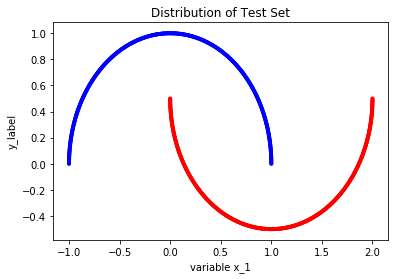

In [11]:
### a
test_x, test_y = make_moons(1000)
plt.scatter(test_x[:,0], test_x[:,1], c=test_y, marker='.', cmap=cm.bwr)
plt.title("Distribution of Test Set")
plt.xlabel("variable x_1")
plt.ylabel("y_label")
plt.show()

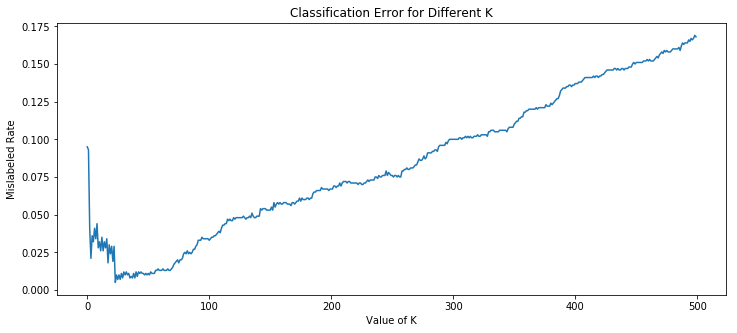

In [12]:
### b
def KNN_ERR(k, x_train, y_train, x_test, y_test):
    '''Assume the input k s a 1-d np.array'''
    ERR = []
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pre = knn.predict(x_test)
        err = accuracy(y_test, pre)
        ERR.append(1-err)
    return ERR

k = np.arange(1,501,1)
ERR = KNN_ERR(k, x, y, test_x, test_y)
fig = plt.figure(figsize = (12, 5))
plt.plot(ERR, '-')
plt.title("Classification Error for Different K")
plt.xlabel("Value of K")
plt.ylabel("Mislabeled Rate")
plt.show()

**(c).** The error rate of KNN first goes down, reach the minimum, and the goes up.

**(d).** The general rule is, the higher the error rate, the higher the bias, and the more flexible the model, the less the variance. In this scenario, when $K=500$ the model has the highest bias. When $K=1$ the model has the highest variance.

**(e).** The optimal value of $K$ is 23. It has the smallest test eroor rate, which means a great performance. Also, the $K$ is neither too big or too small, so this $K$ could have a great balance between bias and variance and reach the smallest overall error rate. 

In [13]:
min_k = np.where(ERR == min(ERR))
print("Reach the samllest error when K = %d" % min_k)

Reach the samllest error when K = 23


**(f)** In general, the less restriction on the model, the more flexibility the model has. The more potential shape of data could fit, the more flexibility the model has.

For linear model, the more the coefficients, the more flexibility the model. Lasso, though relied upon a linear model, it is generally less flexible because it has more restriction on its coefficients. 

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [14]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

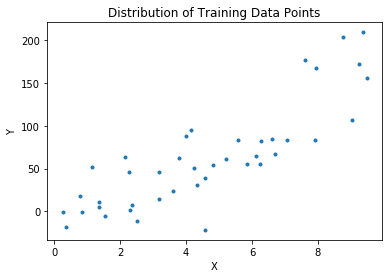

In [15]:
from sklearn.linear_model import LinearRegression

### a
plt.scatter(x_train, y_train, marker='.')
plt.title("Distribution of Training Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [16]:
### b
X_train = np.expand_dims(x_train, 1)
Y_train = np.array(y_train)

reg = LinearRegression().fit(X_train, Y_train)
print("Estimated Model: \nY = %f + %f * X" % (reg.intercept_, reg.coef_))
print("R square: %.4f" % reg.score(X_train, Y_train))
MSE = np.mean((reg.predict(X_train)-Y_train)**2)
print("Mean Square Error: %.4f" % MSE)

Estimated Model: 
Y = -21.730783 + 18.303207 * X
R square: 0.7015
Mean Square Error: 1052.5854


In [17]:
### c
X_train_square = np.c_[X_train, X_train**2]

reg_square = LinearRegression().fit(X_train_square, Y_train)
intercept, coef = reg_square.intercept_, reg_square.coef_
print("Estimated Model: \nY = %f + %f * X + %f * X^2" % (intercept, coef[0], coef[1]))
print("R square: %.4f" % reg_square.score(X_train_square, Y_train))
MSE = np.mean((reg_square.predict(X_train_square)-Y_train)**2)
print("Mean Square Error: %.4f" % MSE)

Estimated Model: 
Y = 8.007337 + 0.471007 * X + 1.832082 * X^2
R square: 0.7490
Mean Square Error: 884.7978


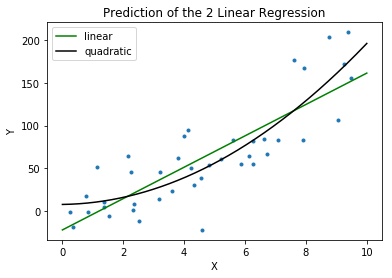

In [18]:
### d
grid = np.linspace(0, 10, 1000).reshape(1000,1)
grid_square = np.c_[grid, grid**2]

plt.scatter(x_train, y_train, marker='.')
Y_pre = reg.predict(grid)
plt.plot(grid, Y_pre, '-g', label = "linear")
Y_pre_square = reg_square.predict(grid_square)
plt.plot(grid, Y_pre_square, '-k', label = "quadratic")
plt.title("Prediction of the 2 Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [19]:
### e
X_test = np.expand_dims(x_test, 1)
Y_test = np.array(y_test)
X_test_square = np.c_[X_test, X_test**2]

print("R square of test data: %.4f" % reg.score(X_test, Y_test))
MSE = np.mean((reg.predict(X_test)-Y_test)**2)
print("Mean Square Error of test data: %.4f" % MSE)
print("-"*50)
print("R square of test data: %.4f" % reg_square.score(X_test_square, Y_test))
MSE = np.mean((reg_square.predict(X_test_square)-Y_test)**2)
print("Mean Square Error of test data: %.4f" % MSE)

R square of test data: 0.5556
Mean Square Error of test data: 2023.3121
--------------------------------------------------
R square of test data: 0.6928
Mean Square Error of test data: 1398.8818


**(f).** The quadradtic model perform better on both the training data and the test data. First of all, the quadratic model has more numbers of coefficients and thus more flexibility. This leads to the nature of better performance on train data. Also, both the train data and the test data has a pattern of non-linear relations between $X$ and $Y$, which could seen from the plot below. The test data shows even more non-linear relation between $X$ and $Y$. Therefore, the quadratic model could address more about this kind of relations in its prediction, which leads to a better performance even on the test data.

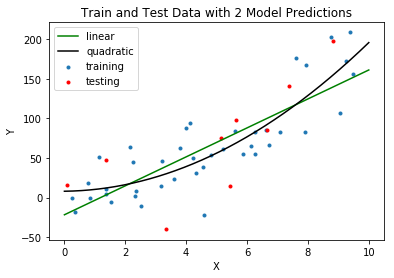

In [20]:
plt.scatter(x_train, y_train, marker='.', label = 'training')
plt.scatter(x_test, y_test, marker='.', c='r', label = 'testing')
plt.plot(grid, Y_pre, '-g', label = 'linear')
plt.plot(grid, Y_pre_square, '-k', label = 'quadratic')
plt.title("Train and Test Data with 2 Model Predictions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**(g)** If the test data were significantly different from the training dataset, the statistical indicator (such as $R^2$ or $MSE$) for the model performances on the training dataset would make no sense on the prediction performance on the test data. Even if you fit a model to the training dataset and got a great $R^2$ and small $MSE$, you might also get a bad performance on the test data. Our model were fitted based on the assumptions that the data in the training dataset and the data in the testing dataset have similar distribution. If this assumption is violated, we can hardly train a model on training data but get a great performance on both training data and test data.